### Steps:
<ul>
    <li>Quality control
    <li>Trim flank sequences
    <li>Count unique insertion sequences
    <li>Collapse on 1/2-Hamming distances
    <li>Translate DNA --> amino acids
    <li>Compute:<ul>
                    <li>Frequency
                    <li>Average frequency
                    <li>Enrichment Score
                    <li>Heatmap
</ul>

2 tool suggestions:
- UMItools (CLI tool) - clustering algorithm
- cutadapt 

In the large fastq library file, I'm only pulling the sequences that I've already found in the tissue files


## Quality control (skipped for now)

## Trim Flank Sequences
Trimming of invariable sequence flanking the insertion sequence allowing a 10% error rate (currently allowing 0% error rate--we'll work on this later)

In [1]:
import gzip
from mimetypes import guess_type
from functools import partial
from Bio import SeqIO

In [2]:
input_file = '/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA/1153-cDNA-8V8_S30_L001_R1_001.fastq.gz'

encoding = guess_type(input_file)[1]  # uses file extension
_open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open

read_count = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        read_count += 1

print(read_count)

173019


In [3]:
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        print(record)
        print(record.seq)
        break

ID: M06176:70:000000000-JW4VC:1:1101:8803:1076
Name: M06176:70:000000000-JW4VC:1:1101:8803:1076
Description: M06176:70:000000000-JW4VC:1:1101:8803:1076 1:N:0:NCGGTCCAAC+NCTTACATCA
Number of features: 0
Per letter annotation for: phred_quality
Seq('TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCA...CGG')
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCAAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG


In [4]:
Left_flank = 'taacttgcagcagcaaGGC' 
Right_flank = 'GCCaacacggctcctcaaa'

Left_flank = Left_flank.upper()
Right_flank = Right_flank.upper()
print(Left_flank, Right_flank)

TAACTTGCAGCAGCAAGGC GCCAACACGGCTCCTCAAA


In [5]:
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        print(record.seq)
        if Left_flank in record.seq:
            index = record.seq.find(Left_flank)
            print('Left_flank in record.seq at index : ', str(index))
            left_flank_loc = record.seq[:index] + ' left flank start --> ' + record.seq[index:index + len(Left_flank)] + ' <-- left flank end ' + record.seq[index + len(Left_flank):]
            print(left_flank_loc)
        if Right_flank in record.seq:
            index = record.seq.find(Right_flank)
            print('Right_flank in record.seq at index : ', str(index))
            Right_flank_loc = record.seq[:index] + ' right flank start --> ' + record.seq[index:index + len(Right_flank)] + ' <-- right flank end ' + record.seq[index + len(Right_flank):]
            print(Right_flank_loc)
            break

TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCAAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
Left_flank in record.seq at index :  39
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end AAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCGTGCCAACACGGNTNCTNNAATTGGANNNNNCNACAGCCAGNGGGNCTTACCCGNNATGGTCTGGCAGAACCGGGACGTGTACCT
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCTCTGAAANGCCGANTGGTTTCNNNAACACGGCTCCTNAAATTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
Left_flank in record.seq at index :  39
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end TCTGAAANGCCGANTGGTTTCNNNAACACGGCTCCTNAAATTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCCAGGGTCNTGTTCNGCAGCAGGNCAACACGG

In [11]:
# goal: display left and right flank tags together 
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
#         print(record.seq)
        if Left_flank in record.seq and Right_flank in record.seq:
            l_start = record.seq.find(Left_flank)
            r_start = record.seq.find(Right_flank)
            print('Left_flank in record.seq at index : ', str(l_start))
            print('Right_flank in record.seq at index : ', str(r_start))
            annotated_seq = record.seq[:l_start] + ' left flank start --> ' + record.seq[l_start:l_start + len(Left_flank)] + ' <-- left flank end ' + record.seq[l_start + len(Left_flank):r_start]
            annotated_seq += ' right flank start --> ' + record.seq[r_start:r_start + len(Right_flank)] + ' <-- right flank end ' + record.seq[r_start + len(Right_flank):]
            print(annotated_seq)
            break


Left_flank in record.seq at index :  39
Right_flank in record.seq at index :  79
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end CTGTACCNGCATCATACTGAC right flank start --> GCCAACACGGCTCCTCAAA <-- right flank end TTGGAACTTNCAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG


In [13]:
# goal: extract all insert sequences
insert_seqs = []
index = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        if Left_flank in record.seq and Right_flank in record.seq:
            seq_start = record.seq.find(Left_flank) + len(Left_flank)
            seq_end = record.seq.find(Right_flank)
#             print('start: ', seq_start, ', end: ', seq_end)
            seq = record.seq[seq_start:seq_end]
            insert_seqs.append(seq)
            index += 1
print(index)
print(len(insert_seqs))


115746
115746


In [14]:
print(len(insert_seqs))

115746


In [15]:
seq_lengths = [len(seq) for seq in insert_seqs]
seq_lengths

[21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 24,
 21,
 21,
 21,
 21,
 30,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 24,
 21,
 24,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 30,
 21,
 24,
 21,
 24,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,


In [17]:
seq_length_dict = {}
for seq in insert_seqs:
    if len(seq) not in seq_length_dict:
        seq_length_dict[len(seq)] = 1
    else:
        seq_length_dict[len(seq)] += 1

seq_length_dict

{21: 104313, 24: 10511, 30: 769, 27: 17, 18: 102, 20: 23, 19: 2, 22: 5, 23: 4}

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
seq_length_df = pd.DataFrame.from_dict(seq_length_dict, orient='index', columns=['count'])
seq_length_df

,count
21,104313
24,10511
30,769
27,17
18,102
20,23
19,2
22,5
23,4


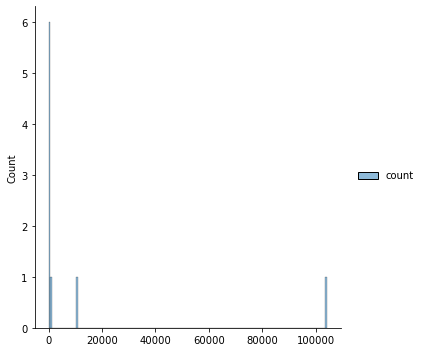

In [22]:
sns.displot(seq_length_df)